In [1]:
!pip uninstall tensorflow
!pip install tensorflow==2.1.0
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available() == True)

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 421.8MB 43kB/s 
     |████████████████████████████████| 450kB 44.6MB/s 
     |████████████████████████████████| 3.9MB 43.4MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Succes

In [1]:
!pip install opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available() == True)

2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model
import pandas as pd
from scipy.stats import norm
import pickle as pkl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import scipy
import imageio
import cv2

In [3]:
scipy.__version__

'1.4.1'

In [3]:
# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'monet2photo'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

In [5]:
!wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip

--2020-03-07 07:10:56--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305231073 (291M) [application/zip]
Saving to: ‘monet2photo.zip’

monet2photo.zip     100%[===================>] 291.09M  21.4MB/s    in 15s     

2020-03-07 07:11:12 (20.1 MB/s) - ‘monet2photo.zip’ saved [305231073/305231073]



In [6]:
!unzip monet2photo.zip

Archive:  monet2photo.zip
   creating: monet2photo/
   creating: monet2photo/trainA/
  inflating: monet2photo/trainA/01159.jpg  
  inflating: monet2photo/trainA/01048.jpg  
  inflating: monet2photo/trainA/01144.jpg  
  inflating: monet2photo/trainA/00799.jpg  
  inflating: monet2photo/trainA/00897.jpg  
  inflating: monet2photo/trainA/00998.jpg  
  inflating: monet2photo/trainA/00883.jpg  
  inflating: monet2photo/trainA/00985.jpg  
  inflating: monet2photo/trainA/00311.jpg  
  inflating: monet2photo/trainA/01243.jpg  
  inflating: monet2photo/trainA/01259.jpg  
  inflating: monet2photo/trainA/00454.jpg  
  inflating: monet2photo/trainA/00461.jpg  
  inflating: monet2photo/trainA/01283.jpg  
  inflating: monet2photo/trainA/00901.jpg  
  inflating: monet2photo/trainA/00502.jpg  
  inflating: monet2photo/trainA/00176.jpg  
  inflating: monet2photo/trainA/01157.jpg  
  inflating: monet2photo/trainA/00935.jpg  
  inflating: monet2photo/trainA/00929.jpg  
  inflating: monet2photo/trainA/008

  inflating: monet2photo/trainA/00261.jpg  
  inflating: monet2photo/trainA/00334.jpg  
  inflating: monet2photo/trainA/00624.jpg  
  inflating: monet2photo/trainA/01119.jpg  
  inflating: monet2photo/trainA/00202.jpg  
  inflating: monet2photo/trainA/00906.jpg  
  inflating: monet2photo/trainA/00436.jpg  
  inflating: monet2photo/trainA/00959.jpg  
  inflating: monet2photo/trainA/00812.jpg  
  inflating: monet2photo/trainA/00872.jpg  
  inflating: monet2photo/trainA/00301.jpg  
  inflating: monet2photo/trainA/00154.jpg  
  inflating: monet2photo/trainA/01035.jpg  
  inflating: monet2photo/trainA/00891.jpg  
  inflating: monet2photo/trainA/00213.jpg  
  inflating: monet2photo/trainA/00166.jpg  
  inflating: monet2photo/trainA/01174.jpg  
  inflating: monet2photo/trainA/00443.jpg  
  inflating: monet2photo/trainA/01302.jpg  
  inflating: monet2photo/trainA/00818.jpg  
  inflating: monet2photo/trainA/01211.jpg  
  inflating: monet2photo/trainA/00975.jpg  
  inflating: monet2photo/trainA/

  inflating: monet2photo/trainA/00842.jpg  
  inflating: monet2photo/trainA/01236.jpg  
  inflating: monet2photo/trainA/00732.jpg  
  inflating: monet2photo/trainA/01052.jpg  
  inflating: monet2photo/trainA/00479.jpg  
  inflating: monet2photo/trainA/00023.jpg  
  inflating: monet2photo/trainA/00072.jpg  
  inflating: monet2photo/trainA/00884.jpg  
  inflating: monet2photo/trainA/00356.jpg  
  inflating: monet2photo/trainA/00704.jpg  
  inflating: monet2photo/trainA/01313.jpg  
  inflating: monet2photo/trainA/01196.jpg  
  inflating: monet2photo/trainA/00754.jpg  
  inflating: monet2photo/trainA/00621.jpg  
  inflating: monet2photo/trainA/00688.jpg  
  inflating: monet2photo/trainA/00256.jpg  
  inflating: monet2photo/trainA/00442.jpg  
  inflating: monet2photo/trainA/01193.jpg  
  inflating: monet2photo/trainA/00029.jpg  
  inflating: monet2photo/trainA/00681.jpg  
  inflating: monet2photo/trainA/00308.jpg  
  inflating: monet2photo/trainA/00909.jpg  
  inflating: monet2photo/trainA/

  inflating: monet2photo/trainA/01189.jpg  
  inflating: monet2photo/trainA/00177.jpg  
  inflating: monet2photo/trainA/00018.jpg  
  inflating: monet2photo/trainA/00306.jpg  
  inflating: monet2photo/trainA/00245.jpg  
  inflating: monet2photo/trainA/00462.jpg  
  inflating: monet2photo/trainA/01001.jpg  
  inflating: monet2photo/trainA/00833.jpg  
  inflating: monet2photo/trainA/00708.jpg  
  inflating: monet2photo/trainA/00823.jpg  
  inflating: monet2photo/trainA/01237.jpg  
  inflating: monet2photo/trainA/00727.jpg  
  inflating: monet2photo/trainA/00186.jpg  
  inflating: monet2photo/trainA/00325.jpg  
  inflating: monet2photo/trainA/00903.jpg  
  inflating: monet2photo/trainA/00273.jpg  
  inflating: monet2photo/trainA/00544.jpg  
  inflating: monet2photo/trainA/01079.jpg  
  inflating: monet2photo/trainA/00076.jpg  
  inflating: monet2photo/trainA/00431.jpg  
  inflating: monet2photo/trainA/00958.jpg  
  inflating: monet2photo/trainA/01203.jpg  
  inflating: monet2photo/trainA/

  inflating: monet2photo/testB/2014-08-02 11:46:18.jpg  
  inflating: monet2photo/testB/2014-10-18 13:22:54.jpg  
  inflating: monet2photo/testB/2014-12-15 00:09:27.jpg  
  inflating: monet2photo/testB/2014-08-17 23:34:43.jpg  
  inflating: monet2photo/testB/2014-10-19 17:17:47.jpg  
  inflating: monet2photo/testB/2014-12-08 02:32:42.jpg  
  inflating: monet2photo/testB/2014-12-09 01:55:33.jpg  
  inflating: monet2photo/testB/2014-08-28 09:33:26.jpg  
  inflating: monet2photo/testB/2014-10-17 04:09:31.jpg  
  inflating: monet2photo/testB/2015-04-13 13:05:23.jpg  
  inflating: monet2photo/testB/2014-08-19 01:15:55.jpg  
  inflating: monet2photo/testB/2014-08-18 01:13:49.jpg  
  inflating: monet2photo/testB/2014-08-06 08:21:56.jpg  
  inflating: monet2photo/testB/2015-04-14 06:32:05.jpg  
  inflating: monet2photo/testB/2015-04-25 10:24:38.jpg  
  inflating: monet2photo/testB/2015-04-13 05:42:20.jpg  
  inflating: monet2photo/testB/2014-08-12 02:21:03.jpg  
  inflating: monet2photo/testB/

  inflating: monet2photo/testB/2014-09-03 06:37:24.jpg  
  inflating: monet2photo/testB/2014-09-02 03:32:20.jpg  
  inflating: monet2photo/testB/2014-08-25 21:07:24.jpg  
  inflating: monet2photo/testB/2015-04-20 18:35:35.jpg  
  inflating: monet2photo/testB/2014-08-21 19:03:54.jpg  
  inflating: monet2photo/testB/2015-04-05 13:16:14.jpg  
  inflating: monet2photo/testB/2014-09-15 20:33:21.jpg  
  inflating: monet2photo/testB/2015-04-09 02:14:34.jpg  
  inflating: monet2photo/testB/2014-10-01 19:00:25.jpg  
  inflating: monet2photo/testB/2014-08-20 11:37:35.jpg  
  inflating: monet2photo/testB/2014-12-29 05:45:08.jpg  
  inflating: monet2photo/testB/2014-12-09 19:30:09.jpg  
  inflating: monet2photo/testB/2014-10-11 09:36:03.jpg  
  inflating: monet2photo/testB/2014-08-30 00:04:09.jpg  
  inflating: monet2photo/testB/2015-04-27 13:52:08.jpg  
  inflating: monet2photo/testB/2014-09-15 14:21:29.jpg  
  inflating: monet2photo/testB/2014-10-22 21:24:20.jpg  
  inflating: monet2photo/testB/

  inflating: monet2photo/testB/2015-04-18 17:08:45.jpg  
  inflating: monet2photo/testB/2014-12-28 16:48:28.jpg  
  inflating: monet2photo/testB/2014-08-20 11:42:41.jpg  
  inflating: monet2photo/testB/2014-12-03 11:24:41.jpg  
  inflating: monet2photo/testB/2015-04-06 21:25:55.jpg  
  inflating: monet2photo/testB/2014-09-23 19:35:31.jpg  
  inflating: monet2photo/testB/2014-08-04 20:20:12.jpg  
  inflating: monet2photo/testB/2015-04-09 06:23:06.jpg  
  inflating: monet2photo/testB/2014-09-29 12:17:04.jpg  
  inflating: monet2photo/testB/2014-10-06 13:13:13.jpg  
  inflating: monet2photo/testB/2014-09-17 04:26:48.jpg  
  inflating: monet2photo/testB/2014-09-16 04:31:55.jpg  
  inflating: monet2photo/testB/2014-08-07 10:27:51.jpg  
  inflating: monet2photo/testB/2014-10-28 20:22:31.jpg  
  inflating: monet2photo/testB/2014-08-01 22:38:22.jpg  
  inflating: monet2photo/testB/2015-04-09 16:16:32.jpg  
  inflating: monet2photo/testB/2015-04-19 08:36:56.jpg  
  inflating: monet2photo/testB/

  inflating: monet2photo/trainB/2015-11-13 16:16:47.jpg  
  inflating: monet2photo/trainB/2016-05-15 17:33:38.jpg  
  inflating: monet2photo/trainB/2016-08-09 00:57:24.jpg  
  inflating: monet2photo/trainB/2016-07-27 08:21:53.jpg  
  inflating: monet2photo/trainB/2016-02-26 14:05:36.jpg  
  inflating: monet2photo/trainB/2015-11-23 06:38:05.jpg  
  inflating: monet2photo/trainB/2016-04-11 10:59:19.jpg  
  inflating: monet2photo/trainB/2015-11-28 00:48:42.jpg  
  inflating: monet2photo/trainB/2014-11-15 18:11:35.jpg  
  inflating: monet2photo/trainB/2017-01-02 04:15:42.jpg  
  inflating: monet2photo/trainB/2014-03-22 19:01:01.jpg  
  inflating: monet2photo/trainB/2015-06-09 18:59:52.jpg  
  inflating: monet2photo/trainB/2016-08-29 09:43:54.jpg  
  inflating: monet2photo/trainB/2015-01-02 18:36:11.jpg  
  inflating: monet2photo/trainB/2016-05-15 00:35:24.jpg  
  inflating: monet2photo/trainB/2015-08-07 10:56:43.jpg  
  inflating: monet2photo/trainB/2015-07-21 05:17:06.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-05-02 18:01:51.jpg  
  inflating: monet2photo/trainB/2016-07-23 01:23:09.jpg  
  inflating: monet2photo/trainB/2015-08-27 14:10:17.jpg  
  inflating: monet2photo/trainB/2015-10-01 09:22:03.jpg  
  inflating: monet2photo/trainB/2015-11-09 06:11:07.jpg  
  inflating: monet2photo/trainB/2014-11-07 09:24:05.jpg  
  inflating: monet2photo/trainB/2016-12-15 07:15:20.jpg  
  inflating: monet2photo/trainB/2015-07-08 13:50:11.jpg  
  inflating: monet2photo/trainB/2014-03-19 08:24:08.jpg  
  inflating: monet2photo/trainB/2016-12-05 01:54:07.jpg  
  inflating: monet2photo/trainB/2016-04-05 03:12:13.jpg  
  inflating: monet2photo/trainB/2016-08-07 08:14:53.jpg  
  inflating: monet2photo/trainB/2015-12-28 03:04:30.jpg  
  inflating: monet2photo/trainB/2015-03-28 11:51:17.jpg  
  inflating: monet2photo/trainB/2015-10-09 04:31:54.jpg  
  inflating: monet2photo/trainB/2015-06-14 23:18:17.jpg  
  inflating: monet2photo/trainB/2014-04-15 09:34:13.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-04-26 23:39:23.jpg  
  inflating: monet2photo/trainB/2014-06-27 18:21:00.jpg  
  inflating: monet2photo/trainB/2015-05-08 03:05:44.jpg  
  inflating: monet2photo/trainB/2016-08-16 01:31:55.jpg  
  inflating: monet2photo/trainB/2015-09-04 23:12:40.jpg  
  inflating: monet2photo/trainB/2015-09-18 11:35:20.jpg  
  inflating: monet2photo/trainB/2016-07-06 07:05:00.jpg  
  inflating: monet2photo/trainB/2016-08-26 12:23:41.jpg  
  inflating: monet2photo/trainB/2015-11-18 22:53:04.jpg  
  inflating: monet2photo/trainB/2015-03-15 14:57:46.jpg  
  inflating: monet2photo/trainB/2016-11-15 12:41:40.jpg  
  inflating: monet2photo/trainB/2016-04-03 22:01:12.jpg  
  inflating: monet2photo/trainB/2016-03-21 17:35:08.jpg  
  inflating: monet2photo/trainB/2016-06-09 08:04:04.jpg  
  inflating: monet2photo/trainB/2016-07-19 08:56:48.jpg  
  inflating: monet2photo/trainB/2016-03-17 19:25:31.jpg  
  inflating: monet2photo/trainB/2015-03-08 15:45:50.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-11-19 20:00:10.jpg  
  inflating: monet2photo/trainB/2013-11-30 17:09:33.jpg  
  inflating: monet2photo/trainB/2014-11-23 07:46:12.jpg  
  inflating: monet2photo/trainB/2015-12-14 19:12:24.jpg  
  inflating: monet2photo/trainB/2015-01-09 13:44:39.jpg  
  inflating: monet2photo/trainB/2015-11-04 10:00:26.jpg  
  inflating: monet2photo/trainB/2014-11-15 16:20:16.jpg  
  inflating: monet2photo/trainB/2015-11-19 16:19:41.jpg  
  inflating: monet2photo/trainB/2015-09-02 21:38:30.jpg  
  inflating: monet2photo/trainB/2015-12-22 12:49:10.jpg  
  inflating: monet2photo/trainB/2014-03-15 14:29:42.jpg  
  inflating: monet2photo/trainB/2014-03-01 01:54:43.jpg  
  inflating: monet2photo/trainB/2016-01-27 21:16:02.jpg  
  inflating: monet2photo/trainB/2014-06-11 13:57:04.jpg  
  inflating: monet2photo/trainB/2016-03-03 18:31:22.jpg  
  inflating: monet2photo/trainB/2015-07-12 10:21:09.jpg  
  inflating: monet2photo/trainB/2016-11-23 17:01:36.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-10-31 04:35:13.jpg  
  inflating: monet2photo/trainB/2014-02-17 07:33:35.jpg  
  inflating: monet2photo/trainB/2016-07-15 08:53:56.jpg  
  inflating: monet2photo/trainB/2016-05-09 11:34:31.jpg  
  inflating: monet2photo/trainB/2016-05-07 18:39:45.jpg  
  inflating: monet2photo/trainB/2016-06-11 09:28:45.jpg  
  inflating: monet2photo/trainB/2015-07-23 07:52:05.jpg  
  inflating: monet2photo/trainB/2015-07-15 08:58:14.jpg  
  inflating: monet2photo/trainB/2016-01-19 12:04:48.jpg  
  inflating: monet2photo/trainB/2015-06-14 22:28:12.jpg  
  inflating: monet2photo/trainB/2016-05-30 12:41:12.jpg  
  inflating: monet2photo/trainB/2014-02-21 16:02:29.jpg  
  inflating: monet2photo/trainB/2016-07-23 14:58:44.jpg  
  inflating: monet2photo/trainB/2014-11-23 12:04:30.jpg  
  inflating: monet2photo/trainB/2016-06-13 01:59:21.jpg  
  inflating: monet2photo/trainB/2015-08-03 17:43:20.jpg  
  inflating: monet2photo/trainB/2016-02-29 18:45:19.jpg  
  inflating: m

  inflating: monet2photo/trainB/2014-03-01 03:18:02.jpg  
  inflating: monet2photo/trainB/2014-01-03 18:17:52.jpg  
  inflating: monet2photo/trainB/2016-08-15 07:55:46.jpg  
  inflating: monet2photo/trainB/2015-09-22 03:37:09.jpg  
  inflating: monet2photo/trainB/2016-02-07 07:46:13.jpg  
  inflating: monet2photo/trainB/2015-08-11 03:44:21.jpg  
  inflating: monet2photo/trainB/2016-02-04 23:52:16.jpg  
  inflating: monet2photo/trainB/2016-01-03 23:24:26.jpg  
  inflating: monet2photo/trainB/2015-05-16 04:21:25.jpg  
  inflating: monet2photo/trainB/2016-05-22 18:20:36.jpg  
  inflating: monet2photo/trainB/2015-08-01 09:46:38.jpg  
  inflating: monet2photo/trainB/2014-02-20 15:34:34.jpg  
  inflating: monet2photo/trainB/2014-02-26 01:18:41.jpg  
  inflating: monet2photo/trainB/2015-10-28 03:31:04.jpg  
  inflating: monet2photo/trainB/2014-03-19 23:25:02.jpg  
  inflating: monet2photo/trainB/2014-06-16 17:54:59.jpg  
  inflating: monet2photo/trainB/2014-06-03 11:14:41.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-02-08 20:58:43.jpg  
  inflating: monet2photo/trainB/2015-08-20 09:01:54.jpg  
  inflating: monet2photo/trainB/2016-06-10 09:28:53.jpg  
  inflating: monet2photo/trainB/2015-09-18 02:29:16.jpg  
  inflating: monet2photo/trainB/2015-01-30 00:31:29.jpg  
  inflating: monet2photo/trainB/2015-09-09 11:30:37.jpg  
  inflating: monet2photo/trainB/2016-11-20 10:58:27.jpg  
  inflating: monet2photo/trainB/2015-05-15 12:40:29.jpg  
  inflating: monet2photo/trainB/2015-07-09 16:09:36.jpg  
  inflating: monet2photo/trainB/2015-08-08 09:10:46.jpg  
  inflating: monet2photo/trainB/2015-06-29 05:00:36.jpg  
  inflating: monet2photo/trainB/2016-12-30 13:37:05.jpg  
  inflating: monet2photo/trainB/2015-06-11 09:02:09.jpg  
  inflating: monet2photo/trainB/2016-11-25 09:33:57.jpg  
  inflating: monet2photo/trainB/2015-10-19 04:24:00.jpg  
  inflating: monet2photo/trainB/2014-06-01 03:20:23.jpg  
  inflating: monet2photo/trainB/2013-11-11 12:10:46.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-07-13 10:59:34.jpg  
  inflating: monet2photo/trainB/2016-08-14 04:28:43.jpg  
  inflating: monet2photo/trainB/2016-12-13 05:40:50.jpg  
  inflating: monet2photo/trainB/2014-04-28 18:30:18.jpg  
  inflating: monet2photo/trainB/2016-03-09 11:51:59.jpg  
  inflating: monet2photo/trainB/2015-06-04 14:20:04.jpg  
  inflating: monet2photo/trainB/2014-01-24 12:55:00.jpg  
  inflating: monet2photo/trainB/2015-01-28 05:24:25.jpg  
  inflating: monet2photo/trainB/2015-07-26 01:31:56.jpg  
  inflating: monet2photo/trainB/2015-12-14 01:43:52.jpg  
  inflating: monet2photo/trainB/2015-05-07 04:50:19.jpg  
  inflating: monet2photo/trainB/2016-11-20 23:52:46.jpg  
  inflating: monet2photo/trainB/2015-12-25 09:14:49.jpg  
  inflating: monet2photo/trainB/2016-03-08 15:49:27.jpg  
  inflating: monet2photo/trainB/2016-05-20 10:59:47.jpg  
  inflating: monet2photo/trainB/2015-10-03 14:54:31.jpg  
  inflating: monet2photo/trainB/2016-05-22 19:44:32.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-06-06 08:06:06.jpg  
  inflating: monet2photo/trainB/2016-11-15 11:42:23.jpg  
  inflating: monet2photo/trainB/2015-05-08 03:45:47.jpg  
  inflating: monet2photo/trainB/2015-09-21 16:25:50.jpg  
  inflating: monet2photo/trainB/2015-11-19 06:45:32.jpg  
  inflating: monet2photo/trainB/2017-01-02 18:42:16.jpg  
  inflating: monet2photo/trainB/2015-05-18 20:53:58.jpg  
  inflating: monet2photo/trainB/2016-08-14 11:10:10.jpg  
  inflating: monet2photo/trainB/2016-03-13 05:01:25.jpg  
  inflating: monet2photo/trainB/2016-01-05 00:06:19.jpg  
  inflating: monet2photo/trainB/2016-04-14 02:56:40.jpg  
  inflating: monet2photo/trainB/2015-05-17 08:50:46.jpg  
  inflating: monet2photo/trainB/2015-05-30 03:40:35.jpg  
  inflating: monet2photo/trainB/2016-12-12 02:49:37.jpg  
  inflating: monet2photo/trainB/2015-12-30 08:53:38.jpg  
  inflating: monet2photo/trainB/2016-07-06 11:32:04.jpg  
  inflating: monet2photo/trainB/2016-05-26 02:41:30.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-12-14 21:24:09.jpg  
  inflating: monet2photo/trainB/2016-02-28 18:01:09.jpg  
  inflating: monet2photo/trainB/2016-02-13 08:02:25.jpg  
  inflating: monet2photo/trainB/2016-02-23 09:21:45.jpg  
  inflating: monet2photo/trainB/2015-03-22 22:55:32.jpg  
  inflating: monet2photo/trainB/2015-12-08 09:39:54.jpg  
  inflating: monet2photo/trainB/2015-07-08 20:16:22.jpg  
  inflating: monet2photo/trainB/2016-06-13 15:01:24.jpg  
  inflating: monet2photo/trainB/2015-05-24 20:35:08.jpg  
  inflating: monet2photo/trainB/2016-08-16 03:29:43.jpg  
  inflating: monet2photo/trainB/2016-07-22 09:41:37.jpg  
  inflating: monet2photo/trainB/2016-12-24 02:38:49.jpg  
  inflating: monet2photo/trainB/2016-05-31 16:07:04.jpg  
  inflating: monet2photo/trainB/2015-10-03 05:04:57.jpg  
  inflating: monet2photo/trainB/2013-11-30 23:35:13.jpg  
  inflating: monet2photo/trainB/2015-11-28 10:04:43.jpg  
  inflating: monet2photo/trainB/2015-08-03 02:35:38.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-05-22 22:11:20.jpg  
  inflating: monet2photo/trainB/2015-07-04 01:13:05.jpg  
  inflating: monet2photo/trainB/2015-09-20 01:42:42.jpg  
  inflating: monet2photo/trainB/2016-12-08 17:06:21.jpg  
  inflating: monet2photo/trainB/2017-01-02 11:20:43.jpg  
  inflating: monet2photo/trainB/2014-11-05 15:23:02.jpg  
  inflating: monet2photo/trainB/2016-01-29 11:53:47.jpg  
  inflating: monet2photo/trainB/2015-05-10 08:04:03.jpg  
  inflating: monet2photo/trainB/2016-07-09 21:07:11.jpg  
  inflating: monet2photo/trainB/2015-05-28 14:09:54.jpg  
  inflating: monet2photo/trainB/2016-12-18 07:55:29.jpg  
  inflating: monet2photo/trainB/2015-11-04 10:13:37.jpg  
  inflating: monet2photo/trainB/2016-08-30 11:46:44.jpg  
  inflating: monet2photo/trainB/2015-12-18 20:50:29.jpg  
  inflating: monet2photo/trainB/2015-08-14 06:13:19.jpg  
  inflating: monet2photo/trainB/2014-07-06 15:40:47.jpg  
  inflating: monet2photo/trainB/2015-11-09 11:33:45.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-08-14 13:44:16.jpg  
  inflating: monet2photo/trainB/2015-11-27 19:05:03.jpg  
  inflating: monet2photo/trainB/2014-05-03 09:40:46.jpg  
  inflating: monet2photo/trainB/2016-03-14 05:50:56.jpg  
  inflating: monet2photo/trainB/2015-05-15 16:46:25.jpg  
  inflating: monet2photo/trainB/2016-12-10 04:09:33.jpg  
  inflating: monet2photo/trainB/2015-10-17 05:49:55.jpg  
  inflating: monet2photo/trainB/2014-07-13 01:14:00.jpg  
  inflating: monet2photo/trainB/2016-02-18 19:29:56.jpg  
  inflating: monet2photo/trainB/2016-12-05 06:45:12.jpg  
  inflating: monet2photo/trainB/2016-07-09 14:41:46.jpg  
  inflating: monet2photo/trainB/2014-05-13 08:52:22.jpg  
  inflating: monet2photo/trainB/2014-07-20 16:26:31.jpg  
  inflating: monet2photo/trainB/2016-08-04 22:47:08.jpg  
  inflating: monet2photo/trainB/2016-05-30 04:24:24.jpg  
  inflating: monet2photo/trainB/2015-09-03 19:41:24.jpg  
  inflating: monet2photo/trainB/2016-04-06 22:12:48.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-04-10 00:25:10.jpg  
  inflating: monet2photo/trainB/2016-05-31 01:29:29.jpg  
  inflating: monet2photo/trainB/2016-12-14 02:32:52.jpg  
  inflating: monet2photo/trainB/2015-05-25 20:19:28.jpg  
  inflating: monet2photo/trainB/2015-08-26 06:02:52.jpg  
  inflating: monet2photo/trainB/2016-11-19 17:22:08.jpg  
  inflating: monet2photo/trainB/2014-03-30 22:34:24.jpg  
  inflating: monet2photo/trainB/2015-09-04 04:22:37.jpg  
  inflating: monet2photo/trainB/2016-12-16 23:59:37.jpg  
  inflating: monet2photo/trainB/2015-11-26 06:55:41.jpg  
  inflating: monet2photo/trainB/2015-03-01 06:15:32.jpg  
  inflating: monet2photo/trainB/2015-06-19 04:20:33.jpg  
  inflating: monet2photo/trainB/2016-03-28 04:40:38.jpg  
  inflating: monet2photo/trainB/2016-05-15 21:43:30.jpg  
  inflating: monet2photo/trainB/2014-02-01 13:29:25.jpg  
  inflating: monet2photo/trainB/2016-04-11 18:39:56.jpg  
  inflating: monet2photo/trainB/2014-11-20 09:01:44.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-12-21 07:45:26.jpg  
  inflating: monet2photo/trainB/2016-03-05 11:10:42.jpg  
  inflating: monet2photo/trainB/2015-11-20 12:03:52.jpg  
  inflating: monet2photo/trainB/2016-01-05 16:32:53.jpg  
  inflating: monet2photo/trainB/2015-12-21 14:41:18.jpg  
  inflating: monet2photo/trainB/2015-01-31 05:12:08.jpg  
  inflating: monet2photo/trainB/2016-05-30 11:23:32.jpg  
  inflating: monet2photo/trainB/2016-04-26 00:43:25.jpg  
  inflating: monet2photo/trainB/2015-07-03 10:09:55.jpg  
  inflating: monet2photo/trainB/2015-09-17 08:32:55.jpg  
  inflating: monet2photo/trainB/2015-07-26 06:31:24.jpg  
  inflating: monet2photo/trainB/2016-06-11 18:21:20.jpg  
  inflating: monet2photo/trainB/2016-12-08 12:40:39.jpg  
  inflating: monet2photo/trainB/2015-08-08 12:23:05.jpg  
  inflating: monet2photo/trainB/2016-02-06 20:34:16.jpg  
  inflating: monet2photo/trainB/2016-03-20 12:38:53.jpg  
  inflating: monet2photo/trainB/2015-02-03 21:51:43.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-03-07 08:46:36.jpg  
  inflating: monet2photo/trainB/2015-10-19 20:42:55.jpg  
  inflating: monet2photo/trainB/2015-08-31 02:30:10.jpg  
  inflating: monet2photo/trainB/2015-08-16 18:07:08.jpg  
  inflating: monet2photo/trainB/2016-05-20 01:13:44.jpg  
  inflating: monet2photo/trainB/2014-04-30 14:29:32.jpg  
  inflating: monet2photo/trainB/2015-08-17 13:34:56.jpg  
  inflating: monet2photo/trainB/2014-05-04 12:31:08.jpg  
  inflating: monet2photo/trainB/2015-12-14 18:58:44.jpg  
  inflating: monet2photo/trainB/2014-11-24 00:21:42.jpg  
  inflating: monet2photo/trainB/2015-08-25 15:08:03.jpg  
  inflating: monet2photo/trainB/2014-11-19 14:11:37.jpg  
  inflating: monet2photo/trainB/2016-06-03 09:36:37.jpg  
  inflating: monet2photo/trainB/2016-12-05 00:03:39.jpg  
  inflating: monet2photo/trainB/2015-03-22 08:49:10.jpg  
  inflating: monet2photo/trainB/2014-11-29 08:15:46.jpg  
  inflating: monet2photo/trainB/2016-08-16 07:26:25.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-04-24 10:26:52.jpg  
  inflating: monet2photo/trainB/2015-09-22 01:02:22.jpg  
  inflating: monet2photo/trainB/2015-06-05 03:06:50.jpg  
  inflating: monet2photo/trainB/2016-12-18 11:45:26.jpg  
  inflating: monet2photo/trainB/2015-02-22 15:25:59.jpg  
  inflating: monet2photo/trainB/2016-03-20 17:55:47.jpg  
  inflating: monet2photo/trainB/2014-06-27 03:40:58.jpg  
  inflating: monet2photo/trainB/2015-10-18 19:38:10.jpg  
  inflating: monet2photo/trainB/2014-07-01 16:25:06.jpg  
  inflating: monet2photo/trainB/2015-08-28 19:36:07.jpg  
  inflating: monet2photo/trainB/2015-06-30 17:20:03.jpg  
  inflating: monet2photo/trainB/2016-04-03 11:10:53.jpg  
  inflating: monet2photo/trainB/2015-08-11 10:31:46.jpg  
  inflating: monet2photo/trainB/2015-11-23 01:37:16.jpg  
  inflating: monet2photo/trainB/2016-12-09 23:52:43.jpg  
  inflating: monet2photo/trainB/2016-01-18 08:42:52.jpg  
  inflating: monet2photo/trainB/2016-12-04 13:05:42.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-05-04 08:30:47.jpg  
  inflating: monet2photo/trainB/2015-07-21 20:13:18.jpg  
  inflating: monet2photo/trainB/2015-06-11 20:58:08.jpg  
  inflating: monet2photo/trainB/2015-12-20 01:52:35.jpg  
  inflating: monet2photo/trainB/2016-11-19 08:36:08.jpg  
  inflating: monet2photo/trainB/2016-12-11 07:41:00.jpg  
  inflating: monet2photo/trainB/2015-06-07 02:08:42.jpg  
  inflating: monet2photo/trainB/2016-08-30 11:15:34.jpg  
  inflating: monet2photo/trainB/2016-05-22 14:26:01.jpg  
  inflating: monet2photo/trainB/2016-02-13 13:05:02.jpg  
  inflating: monet2photo/trainB/2016-08-03 11:54:06.jpg  
  inflating: monet2photo/trainB/2015-12-11 14:21:21.jpg  
  inflating: monet2photo/trainB/2016-04-18 08:27:03.jpg  
  inflating: monet2photo/trainB/2015-08-02 09:15:54.jpg  
  inflating: monet2photo/trainB/2016-03-19 18:22:07.jpg  
  inflating: monet2photo/trainB/2016-05-31 11:35:13.jpg  
  inflating: monet2photo/trainB/2015-08-31 12:54:35.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-11-06 09:24:04.jpg  
  inflating: monet2photo/trainB/2016-07-08 23:52:29.jpg  
  inflating: monet2photo/trainB/2015-02-09 22:45:56.jpg  
  inflating: monet2photo/trainB/2014-06-28 09:40:25.jpg  
  inflating: monet2photo/trainB/2014-07-14 10:01:24.jpg  
  inflating: monet2photo/trainB/2014-07-14 21:10:15.jpg  
  inflating: monet2photo/trainB/2016-04-04 00:06:21.jpg  
  inflating: monet2photo/trainB/2015-06-13 05:46:16.jpg  
  inflating: monet2photo/trainB/2013-12-28 03:03:11.jpg  
  inflating: monet2photo/trainB/2015-05-18 01:52:22.jpg  
  inflating: monet2photo/trainB/2015-03-16 19:18:30.jpg  
  inflating: monet2photo/trainB/2015-09-27 18:02:26.jpg  
  inflating: monet2photo/trainB/2016-08-30 07:07:32.jpg  
  inflating: monet2photo/trainB/2015-10-03 16:55:33.jpg  
  inflating: monet2photo/trainB/2015-09-21 19:11:05.jpg  
  inflating: monet2photo/trainB/2016-11-23 00:00:08.jpg  
  inflating: monet2photo/trainB/2014-11-17 03:55:35.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-07-09 12:11:32.jpg  
  inflating: monet2photo/trainB/2015-12-27 17:18:59.jpg  
  inflating: monet2photo/trainB/2015-06-21 07:10:22.jpg  
  inflating: monet2photo/trainB/2016-08-26 22:05:09.jpg  
  inflating: monet2photo/trainB/2014-05-01 08:40:45.jpg  
  inflating: monet2photo/trainB/2015-05-28 06:03:30.jpg  
  inflating: monet2photo/trainB/2016-03-28 03:47:28.jpg  
  inflating: monet2photo/trainB/2016-07-26 05:47:39.jpg  
  inflating: monet2photo/trainB/2015-11-07 13:07:19.jpg  
  inflating: monet2photo/trainB/2016-02-14 11:36:24.jpg  
  inflating: monet2photo/trainB/2015-09-08 01:29:18.jpg  
  inflating: monet2photo/trainB/2015-05-21 20:16:46.jpg  
  inflating: monet2photo/trainB/2016-07-08 02:01:55.jpg  
  inflating: monet2photo/trainB/2017-01-02 11:29:05.jpg  
  inflating: monet2photo/trainB/2016-05-29 11:22:41.jpg  
  inflating: monet2photo/trainB/2016-01-21 13:16:37.jpg  
  inflating: monet2photo/trainB/2016-02-09 22:48:14.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-01-23 11:49:05.jpg  
  inflating: monet2photo/trainB/2015-07-30 23:56:14.jpg  
  inflating: monet2photo/trainB/2015-03-18 00:22:31.jpg  
  inflating: monet2photo/trainB/2015-07-06 06:01:18.jpg  
  inflating: monet2photo/trainB/2015-10-10 05:49:37.jpg  
  inflating: monet2photo/trainB/2016-12-10 08:13:01.jpg  
  inflating: monet2photo/trainB/2015-12-01 04:21:10.jpg  
  inflating: monet2photo/trainB/2015-09-21 09:31:54.jpg  
  inflating: monet2photo/trainB/2016-02-29 18:00:07.jpg  
  inflating: monet2photo/trainB/2016-07-18 02:24:20.jpg  
  inflating: monet2photo/trainB/2016-02-22 10:45:09.jpg  
  inflating: monet2photo/trainB/2015-07-10 09:40:06.jpg  
  inflating: monet2photo/trainB/2015-11-30 10:56:25.jpg  
  inflating: monet2photo/trainB/2016-02-16 18:10:09.jpg  
  inflating: monet2photo/trainB/2016-06-13 23:41:47.jpg  
  inflating: monet2photo/trainB/2013-11-21 01:47:41.jpg  
  inflating: monet2photo/trainB/2016-08-05 13:11:46.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-09-29 02:10:02.jpg  
  inflating: monet2photo/trainB/2015-01-18 13:59:46.jpg  
  inflating: monet2photo/trainB/2015-10-21 13:19:51.jpg  
  inflating: monet2photo/trainB/2014-11-07 08:42:57.jpg  
  inflating: monet2photo/trainB/2015-03-05 18:46:45.jpg  
  inflating: monet2photo/trainB/2016-08-28 21:06:50.jpg  
  inflating: monet2photo/trainB/2016-12-18 02:41:30.jpg  
  inflating: monet2photo/trainB/2015-03-14 09:52:19.jpg  
  inflating: monet2photo/trainB/2015-01-29 22:09:55.jpg  
  inflating: monet2photo/trainB/2015-12-12 16:03:17.jpg  
  inflating: monet2photo/trainB/2015-10-21 12:25:29.jpg  
  inflating: monet2photo/trainB/2014-05-05 11:54:09.jpg  
  inflating: monet2photo/trainB/2015-01-25 14:41:38.jpg  
  inflating: monet2photo/trainB/2015-07-07 21:24:16.jpg  
  inflating: monet2photo/trainB/2016-03-06 14:23:28.jpg  
  inflating: monet2photo/trainB/2016-04-18 04:25:17.jpg  
  inflating: monet2photo/trainB/2016-05-29 11:40:17.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-09-06 03:55:37.jpg  
  inflating: monet2photo/trainB/2015-07-31 22:51:35.jpg  
  inflating: monet2photo/trainB/2015-10-26 08:15:00.jpg  
  inflating: monet2photo/trainB/2015-03-31 05:02:30.jpg  
  inflating: monet2photo/trainB/2015-09-08 19:08:03.jpg  
  inflating: monet2photo/trainB/2016-05-29 21:04:40.jpg  
  inflating: monet2photo/trainB/2014-11-06 09:40:32.jpg  
  inflating: monet2photo/trainB/2015-11-15 06:16:47.jpg  
  inflating: monet2photo/trainB/2014-05-19 14:44:45.jpg  
  inflating: monet2photo/trainB/2015-10-15 21:23:19.jpg  
  inflating: monet2photo/trainB/2016-02-27 07:26:16.jpg  
  inflating: monet2photo/trainB/2015-07-18 17:24:17.jpg  
  inflating: monet2photo/trainB/2015-08-13 05:00:54.jpg  
  inflating: monet2photo/trainB/2014-05-10 08:51:56.jpg  
  inflating: monet2photo/trainB/2015-05-21 19:41:48.jpg  
  inflating: monet2photo/trainB/2016-07-25 03:38:04.jpg  
  inflating: monet2photo/trainB/2016-05-03 22:59:44.jpg  
  inflating: m

  inflating: monet2photo/trainB/2016-02-08 11:51:23.jpg  
  inflating: monet2photo/trainB/2015-10-10 11:39:25.jpg  
  inflating: monet2photo/trainB/2016-08-27 22:19:22.jpg  
  inflating: monet2photo/trainB/2015-09-04 12:10:21.jpg  
  inflating: monet2photo/trainB/2014-01-07 00:54:20.jpg  
  inflating: monet2photo/trainB/2016-01-10 03:56:46.jpg  
  inflating: monet2photo/trainB/2015-10-25 10:06:25.jpg  
  inflating: monet2photo/trainB/2016-03-26 10:31:27.jpg  
  inflating: monet2photo/trainB/2015-11-24 06:44:03.jpg  
  inflating: monet2photo/trainB/2015-07-01 06:13:02.jpg  
  inflating: monet2photo/trainB/2015-07-07 03:25:17.jpg  
  inflating: monet2photo/trainB/2016-02-17 22:20:44.jpg  
  inflating: monet2photo/trainB/2013-11-18 08:52:05.jpg  
  inflating: monet2photo/trainB/2016-06-25 10:30:26.jpg  
  inflating: monet2photo/trainB/2015-11-08 07:40:26.jpg  
  inflating: monet2photo/trainB/2013-12-08 16:10:49.jpg  
  inflating: monet2photo/trainB/2014-03-04 17:55:12.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-06-24 21:52:25.jpg  
  inflating: monet2photo/trainB/2014-03-02 19:29:24.jpg  
  inflating: monet2photo/trainB/2015-03-26 17:38:54.jpg  
  inflating: monet2photo/trainB/2016-12-31 09:39:00.jpg  
  inflating: monet2photo/trainB/2014-11-23 20:25:17.jpg  
  inflating: monet2photo/trainB/2016-04-24 21:22:22.jpg  
  inflating: monet2photo/trainB/2016-06-20 07:48:29.jpg  
  inflating: monet2photo/trainB/2015-09-07 10:22:17.jpg  
  inflating: monet2photo/trainB/2016-04-11 20:47:08.jpg  
  inflating: monet2photo/trainB/2015-07-31 08:34:38.jpg  
  inflating: monet2photo/trainB/2015-11-20 15:13:53.jpg  
  inflating: monet2photo/trainB/2016-05-07 21:54:12.jpg  
  inflating: monet2photo/trainB/2015-10-10 16:49:38.jpg  
  inflating: monet2photo/trainB/2015-01-06 03:24:07.jpg  
  inflating: monet2photo/trainB/2015-08-19 00:41:54.jpg  
  inflating: monet2photo/trainB/2015-09-19 16:32:00.jpg  
  inflating: monet2photo/trainB/2014-05-17 20:53:46.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-08-25 11:14:51.jpg  
  inflating: monet2photo/trainB/2016-07-28 09:43:58.jpg  
  inflating: monet2photo/trainB/2016-11-28 19:53:47.jpg  
  inflating: monet2photo/trainB/2016-08-16 01:53:32.jpg  
  inflating: monet2photo/trainB/2016-12-17 23:43:36.jpg  
  inflating: monet2photo/trainB/2015-11-28 12:28:01.jpg  
  inflating: monet2photo/trainB/2015-08-23 06:46:08.jpg  
  inflating: monet2photo/trainB/2015-12-18 13:11:21.jpg  
  inflating: monet2photo/trainB/2015-12-02 18:41:34.jpg  
  inflating: monet2photo/trainB/2016-05-25 02:30:51.jpg  
  inflating: monet2photo/trainB/2016-12-17 21:57:09.jpg  
  inflating: monet2photo/trainB/2015-02-09 20:59:44.jpg  
  inflating: monet2photo/trainB/2015-06-16 20:15:17.jpg  
  inflating: monet2photo/trainB/2015-10-20 09:05:07.jpg  
  inflating: monet2photo/trainB/2016-03-31 11:37:22.jpg  
  inflating: monet2photo/trainB/2014-04-27 00:41:46.jpg  
  inflating: monet2photo/trainB/2015-03-28 07:46:04.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-06-26 22:09:13.jpg  
  inflating: monet2photo/trainB/2016-12-26 05:42:33.jpg  
  inflating: monet2photo/trainB/2016-01-28 16:32:17.jpg  
  inflating: monet2photo/trainB/2016-01-10 12:39:36.jpg  
  inflating: monet2photo/trainB/2016-01-10 05:36:29.jpg  
  inflating: monet2photo/trainB/2014-11-08 12:42:29.jpg  
  inflating: monet2photo/trainB/2017-01-02 20:36:38.jpg  
  inflating: monet2photo/trainB/2014-02-09 13:58:49.jpg  
  inflating: monet2photo/trainB/2016-02-21 15:51:28.jpg  
  inflating: monet2photo/trainB/2014-06-30 16:49:07.jpg  
  inflating: monet2photo/trainB/2015-08-17 11:12:19.jpg  
  inflating: monet2photo/trainB/2016-12-01 05:27:33.jpg  
  inflating: monet2photo/trainB/2015-12-31 10:47:00.jpg  
  inflating: monet2photo/trainB/2015-10-06 22:15:08.jpg  
  inflating: monet2photo/trainB/2015-01-27 23:02:09.jpg  
  inflating: monet2photo/trainB/2014-04-16 10:18:40.jpg  
  inflating: monet2photo/trainB/2015-10-18 08:45:40.jpg  
  inflating: m

  inflating: monet2photo/trainB/2015-09-30 08:16:12.jpg  
  inflating: monet2photo/trainB/2015-06-17 15:03:41.jpg  
  inflating: monet2photo/trainB/2016-12-04 09:13:18.jpg  
  inflating: monet2photo/trainB/2016-11-29 19:47:41.jpg  
  inflating: monet2photo/trainB/2016-04-18 19:32:57.jpg  
  inflating: monet2photo/trainB/2016-03-09 05:34:11.jpg  
  inflating: monet2photo/trainB/2015-10-13 08:20:13.jpg  
  inflating: monet2photo/trainB/2016-05-04 05:29:28.jpg  
  inflating: monet2photo/trainB/2014-05-19 12:26:07.jpg  
  inflating: monet2photo/trainB/2014-06-08 12:08:42.jpg  
  inflating: monet2photo/trainB/2015-07-11 15:58:12.jpg  
  inflating: monet2photo/trainB/2014-01-30 15:34:49.jpg  
  inflating: monet2photo/trainB/2017-01-03 00:02:26.jpg  
  inflating: monet2photo/trainB/2015-08-01 19:52:36.jpg  
  inflating: monet2photo/trainB/2015-11-18 07:30:39.jpg  
  inflating: monet2photo/trainB/2015-09-09 19:09:28.jpg  
  inflating: monet2photo/trainB/2015-12-13 07:24:05.jpg  
  inflating: m

  inflating: monet2photo/testA/00650.jpg  
  inflating: monet2photo/testA/00330.jpg  
  inflating: monet2photo/testA/01130.jpg  
  inflating: monet2photo/testA/00860.jpg  
  inflating: monet2photo/testA/01200.jpg  
  inflating: monet2photo/testA/00220.jpg  
  inflating: monet2photo/testA/01100.jpg  
  inflating: monet2photo/testA/00260.jpg  
  inflating: monet2photo/testA/00070.jpg  
  inflating: monet2photo/testA/00730.jpg  
  inflating: monet2photo/testA/00640.jpg  
  inflating: monet2photo/testA/00520.jpg  
  inflating: monet2photo/testA/01300.jpg  
  inflating: monet2photo/testA/00950.jpg  
  inflating: monet2photo/testA/00140.jpg  
  inflating: monet2photo/testA/01250.jpg  
  inflating: monet2photo/testA/00855.jpg  
  inflating: monet2photo/testA/01270.jpg  
  inflating: monet2photo/testA/01280.jpg  
  inflating: monet2photo/testA/00590.jpg  
  inflating: monet2photo/testA/00550.jpg  
  inflating: monet2photo/testA/00970.jpg  
  inflating: monet2photo/testA/00290.jpg  
  inflating

In [15]:
class DataLoader():
    def __init__(self, dataset_name, img_res=(256, 256)):
        self.dataset_name = dataset_name
        self.img_res = img_res

    def load_data(self, domain, batch_size=1, is_testing=False):
        data_type = "train%s" % domain if not is_testing else "test%s" % domain
        path = glob('%s/%s/*' % (self.dataset_name, data_type))
        batch_images = np.random.choice(path, size=batch_size)

        imgs = []
        for img_path in batch_images:
            img = self.imread(img_path)
            #plt.imshow(img)
            #print(img)
            if not is_testing:
                img = cv2.resize(img,self.img_res)

                if np.random.random() > 0.5:
                    img = np.fliplr(img)
            else:
                img = cv2.resize(img,self.img_res)
            imgs.append(img)
        #print(imgs)
        imgs = np.array(imgs)/127.5 - 1.

        return imgs

    def load_batch(self, batch_size=1, is_testing=False):
        data_type = "train" if not is_testing else "val"
        path_A = glob('%s/%sA/*' % (self.dataset_name, data_type))
        path_B = glob('%s/%sB/*' % (self.dataset_name, data_type))

        self.n_batches = int(min(len(path_A), len(path_B)) / batch_size)
        total_samples = self.n_batches * batch_size

        # Sample n_batches * batch_size from each path list so that model sees all
        # samples from both domains
        path_A = np.random.choice(path_A, total_samples, replace=False)
        path_B = np.random.choice(path_B, total_samples, replace=False)

        for i in range(self.n_batches-1):
            batch_A = path_A[i*batch_size:(i+1)*batch_size]
            batch_B = path_B[i*batch_size:(i+1)*batch_size]
            imgs_A, imgs_B = [], []
            for img_A, img_B in zip(batch_A, batch_B):
                img_A = self.imread(img_A)
                img_B = self.imread(img_B)

                img_A = cv2.resize(img_A, self.img_res)
                img_B = cv2.resize(img_B, self.img_res)

                if not is_testing and np.random.random() > 0.5:
                        img_A = np.fliplr(img_A)
                        img_B = np.fliplr(img_B)

                imgs_A.append(img_A)
                imgs_B.append(img_B)

            imgs_A = np.array(imgs_A)/127.5 - 1.
            imgs_B = np.array(imgs_B)/127.5 - 1.

            yield imgs_A, imgs_B

    def load_img(self, path):
        img = self.imread(path)
        img = cv2.resize(img, self.img_res)
        img = img/127.5 - 1.
        return img[np.newaxis, :, :, :]

    def imread(self, path):
        #print(path)
        return cv2.imread(path,cv2.IMREAD_COLOR)

In [16]:
IMAGE_SIZE=128
data_loader = DataLoader('monet2photo',img_res=(IMAGE_SIZE,IMAGE_SIZE))

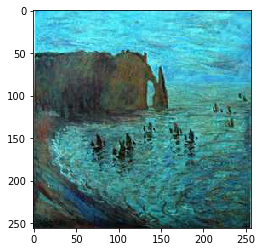

In [17]:
plt.imshow(cv2.imread('monet2photo/trainA/00754.jpg'))

In [18]:
!pip install tensorflow_addons

In [19]:
from collections import deque
import random
import datetime
import tensorflow_addons as tfa

In [20]:
class ReflectionPadding2D(tf.keras.layers.Layer):
    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        self.input_spec = [tf.keras.layers.InputSpec(ndim=4)]
        super(ReflectionPadding2D, self).__init__(**kwargs)

    def compute_output_shape(self, s):
        """ If you are using "channels_last" configuration"""
        return (s[0], s[1] + 2 * self.padding[0], s[2] + 2 * self.padding[1], s[3])

    def call(self, x, mask=None):
        w_pad,h_pad = self.padding
        return tf.pad(x, [[0,0], [h_pad,h_pad], [w_pad,w_pad], [0,0] ], 'REFLECT')

In [21]:
class CycleGAN():
    def __init__(self
        , input_dim
        , learning_rate
        , lambda_validation
        , lambda_reconstr
        , lambda_id
        , generator_type
        , gen_n_filters
        , disc_n_filters
        , buffer_max_length = 50
        ):

        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.buffer_max_length = buffer_max_length
        self.lambda_validation = lambda_validation
        self.lambda_reconstr = lambda_reconstr
        self.lambda_id = lambda_id
        self.generator_type = generator_type
        self.gen_n_filters = gen_n_filters
        self.disc_n_filters = disc_n_filters

        # Input shape
        self.img_rows = input_dim[0]
        self.img_cols = input_dim[1]
        self.channels = input_dim[2]
        self.img_shape = (self.img_rows, self.img_cols, self.channels)

        self.d_losses = []
        self.g_losses = []
        self.epoch = 0

        self.buffer_A = deque(maxlen = self.buffer_max_length)
        self.buffer_B = deque(maxlen = self.buffer_max_length)
        
        # Calculate output shape of D (PatchGAN)
        patch = int(self.img_rows / 2**3)
        self.disc_patch = (patch, patch, 1)

        self.weight_init = tf.keras.initializers.RandomNormal(mean=0., stddev=0.02)

        self.compile_models()

        
    def compile_models(self):

        # Build and compile the discriminators
        self.d_A = self.build_discriminator()
        self.d_B = self.build_discriminator()
        
        self.d_A.compile(loss='mse',
            optimizer=tf.keras.optimizers.Adam(self.learning_rate, 0.5),
            metrics=['accuracy'])
        self.d_B.compile(loss='mse',
            optimizer=tf.keras.optimizers.Adam(self.learning_rate, 0.5),
            metrics=['accuracy'])


        # Build the generators
        if self.generator_type == 'unet':
            self.g_AB = self.build_generator_unet()
            self.g_BA = self.build_generator_unet()
        else:
            self.g_AB = self.build_generator_resnet()
            self.g_BA = self.build_generator_resnet()

        # For the combined model we will only train the generators
        self.d_A.trainable = False
        self.d_B.trainable = False

        # Input images from both domains
        img_A = tf.keras.layers.Input(shape=self.img_shape)
        img_B = tf.keras.layers.Input(shape=self.img_shape)

        # Translate images to the other domain
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)
        # Translate images back to original domain
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)
        # Identity mapping of images
        img_A_id = self.g_BA(img_A)
        img_B_id = self.g_AB(img_B)

        # Discriminators determines validity of translated images
        valid_A = self.d_A(fake_A)
        valid_B = self.d_B(fake_B)

        # Combined model trains generators to fool discriminators
        self.combined = tf.keras.Model(inputs=[img_A, img_B],
                                       outputs=[ valid_A, valid_B,
                                                 reconstr_A, reconstr_B,
                                                 img_A_id, img_B_id ])
        self.combined.compile(loss=['mse', 'mse',
                                    'mae', 'mae',
                                    'mae', 'mae'],
                            loss_weights=[  self.lambda_validation,                       self.lambda_validation,
                                            self.lambda_reconstr, self.lambda_reconstr,
                                            self.lambda_id, self.lambda_id ],
                            optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

        self.d_A.trainable = True
        self.d_B.trainable = True
    

    def build_generator_unet(self):

        def downsample(layer_input, filters, f_size=4):
            d = tf.keras.layers.Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = tfa.layers.InstanceNormalization(axis = -1, center = False, scale = False)(d)
            d = tf.keras.layers.Activation('relu')(d)
            
            return d

        def upsample(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            u = tf.keras.layers.UpSampling2D(size=2)(layer_input)
            u = tf.keras.layers.Conv2D(filters, kernel_size=f_size, strides=1, padding='same')(u)
            u = tfa.layers.InstanceNormalization(axis = -1, center = False, scale = False)(u)
            u = tf.keras.layers.Activation('relu')(u)
            if dropout_rate:
                u = tf.keras.layers.Dropout(dropout_rate)(u)

            u = tf.keras.layers.Concatenate()([u, skip_input])
            return u

        # Image input
        img = tf.keras.layers.Input(shape=self.img_shape)

        # Downsampling
        d1 = downsample(img, self.gen_n_filters) 
        d2 = downsample(d1, self.gen_n_filters*2)
        d3 = downsample(d2, self.gen_n_filters*4)
        d4 = downsample(d3, self.gen_n_filters*8)

        # Upsampling
        u1 = upsample(d4, d3, self.gen_n_filters*4)
        u2 = upsample(u1, d2, self.gen_n_filters*2)
        u3 = upsample(u2, d1, self.gen_n_filters)

        u4 = tf.keras.layers.UpSampling2D(size=2)(u3)
        output_img = tf.keras.layers.Conv2D(self.channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u4)

        return tf.keras.Model(img, output_img)


    def build_generator_resnet(self):

        def conv7s1(layer_input, filters, final):
            y = ReflectionPadding2D(padding =(3,3))(layer_input)
            y = tf.keras.layers.Conv2D(filters, kernel_size=(7,7), strides=1, padding='valid', kernel_initializer = self.weight_init)(y)
            if final:
                y = tf.keras.layers.Activation('tanh')(y)
            else:
                y = tfa.layers.InstanceNormalization(axis = -1, center = False, scale = False)(y)
                y = tf.keras.layers.Activation('relu')(y)
            return y

        def downsample(layer_input,filters):
            y = tf.keras.layers.Conv2D(filters, kernel_size=(3,3), strides=2, padding='same', kernel_initializer = self.weight_init)(layer_input)
            y = tfa.layers.InstanceNormalization(axis = -1, center = False, scale = False)(y)
            y = tf.keras.layers.Activation('relu')(y)
            return y

        def residual(layer_input, filters):
            shortcut = layer_input
            y = ReflectionPadding2D(padding =(1,1))(layer_input)
            y = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, padding='valid', kernel_initializer = self.weight_init)(y)
            y = tfa.layers.InstanceNormalization(axis = -1, center = False, scale = False)(y)
            y = tf.keras.layers.Activation('relu')(y)
            
            y = ReflectionPadding2D(padding =(1,1))(y)
            y = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, padding='valid', kernel_initializer = self.weight_init)(y)
            y = tfa.layers.InstanceNormalization(axis = -1, center = False, scale = False)(y)

            return tf.keras.layers.add([shortcut, y])

        def upsample(layer_input,filters):
            y = tf.keras.layers.Conv2DTranspose(filters, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer = self.weight_init)(layer_input)
            y = tfa.layers.InstanceNormalization(axis = -1, center = False, scale = False)(y)
            y = tf.keras.layers.Activation('relu')(y)
    
            return y


        # Image input
        img = tf.keras.layers.Input(shape=self.img_shape)

        y = img

        y = conv7s1(y, self.gen_n_filters, False)
        y = downsample(y, self.gen_n_filters * 2)
        y = downsample(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = residual(y, self.gen_n_filters * 4)
        y = upsample(y, self.gen_n_filters * 2)
        y = upsample(y, self.gen_n_filters)
        y = conv7s1(y, 3, True)
        output = y

   
        return tf.keras.Model(img, output)


    def build_discriminator(self):

        def conv4(layer_input,filters, stride = 2, norm=True):
            y = tf.keras.layers.Conv2D(filters, kernel_size=(4,4), strides=stride, padding='same', kernel_initializer = self.weight_init)(layer_input)
            
            if norm:
                y = tfa.layers.InstanceNormalization(axis = -1, center = False, scale = False)(y)

            y = tf.keras.layers.LeakyReLU(0.2)(y)
           
            return y

        img = tf.keras.layers.Input(shape=self.img_shape)

        y = conv4(img, self.disc_n_filters, stride = 2, norm = False)
        y = conv4(y, self.disc_n_filters*2, stride = 2)
        y = conv4(y, self.disc_n_filters*4, stride = 2)
        y = conv4(y, self.disc_n_filters*8, stride = 1)

        output = tf.keras.layers.Conv2D(1, kernel_size=4, strides=1, padding='same',kernel_initializer = self.weight_init)(y)

        return tf.keras.Model(img, output)

    def train_discriminators(self, imgs_A, imgs_B, valid, fake):

        # Translate images to opposite domain
        fake_B = self.g_AB.predict(imgs_A)
        fake_A = self.g_BA.predict(imgs_B)

        self.buffer_B.append(fake_B)
        self.buffer_A.append(fake_A)

        fake_A_rnd = random.sample(self.buffer_A, min(len(self.buffer_A), len(imgs_A)))
        fake_B_rnd = random.sample(self.buffer_B, min(len(self.buffer_B), len(imgs_B)))

        # Train the discriminators (original images = real / translated = Fake)
        dA_loss_real = self.d_A.train_on_batch(imgs_A, valid)
        dA_loss_fake = self.d_A.train_on_batch(fake_A_rnd, fake)
        dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)

        dB_loss_real = self.d_B.train_on_batch(imgs_B, valid)
        dB_loss_fake = self.d_B.train_on_batch(fake_B_rnd, fake)
        dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

        # Total disciminator loss
        d_loss_total = 0.5 * np.add(dA_loss, dB_loss)

        return (
            d_loss_total[0]
            , dA_loss[0], dA_loss_real[0], dA_loss_fake[0]
            , dB_loss[0], dB_loss_real[0], dB_loss_fake[0]
            , d_loss_total[1]
            , dA_loss[1], dA_loss_real[1], dA_loss_fake[1]
            , dB_loss[1], dB_loss_real[1], dB_loss_fake[1]
        )

    def train_generators(self, imgs_A, imgs_B, valid):

        # Train the generators
        return self.combined.train_on_batch([imgs_A, imgs_B],
                                                [valid, valid,
                                                imgs_A, imgs_B,
                                                imgs_A, imgs_B])


    def train(self, data_loader, run_folder, epochs, test_A_file, test_B_file, batch_size=1, sample_interval=50):
        
        start_time = datetime.datetime.now()
        # Adversarial loss ground truths
        valid = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)
        for epoch in range(self.epoch, epochs):
            for batch_i, (imgs_A, imgs_B) in enumerate(data_loader.load_batch()):
                d_loss = self.train_discriminators(imgs_A, imgs_B, valid, fake)
                g_loss = self.train_generators(imgs_A, imgs_B, valid)

                elapsed_time = datetime.datetime.now() - start_time

                # Plot the progress
                if batch_i % 100 == 0:
                    print ("[Epoch %d/%d] [Batch %d/%d] [D loss: %f, acc: %3d%%] [G loss: %05f, adv: %05f, recon: %05f, id: %05f] time: %s " \
                        % ( self.epoch, epochs,
                            batch_i, data_loader.n_batches,
                            d_loss[0], 100*d_loss[7],
                            g_loss[0],
                            np.sum(g_loss[1:3]),
                            np.sum(g_loss[3:5]),
                            np.sum(g_loss[5:7]),
                            elapsed_time))

                self.d_losses.append(d_loss)
                self.g_losses.append(g_loss)

                # If at save interval => save generated image samples
                if batch_i % sample_interval == 0:
                    self.sample_images(data_loader, batch_i, run_folder, test_A_file, test_B_file)
                    self.combined.save_weights(os.path.join(run_folder, 'weights/weights-%d.h5' % (self.epoch)))
                    self.combined.save_weights(os.path.join(run_folder, 'weights/weights.h5'))
                    self.save_model(run_folder)

                
            self.epoch += 1

    def sample_images(self, data_loader, batch_i, run_folder, test_A_file, test_B_file):
        
        r, c = 2, 4

        for p in range(2):

            if p == 1:
                imgs_A = data_loader.load_data(domain="A", batch_size=1, is_testing=True)
                imgs_B = data_loader.load_data(domain="B", batch_size=1, is_testing=True)
            else:
                imgs_A = data_loader.load_img('%s/testA/%s' % (data_loader.dataset_name, test_A_file))
                imgs_B = data_loader.load_img('%s/testB/%s' % (data_loader.dataset_name, test_B_file))

            # Translate images to the other domain
            fake_B = self.g_AB.predict(imgs_A)
            fake_A = self.g_BA.predict(imgs_B)
            # Translate back to original domain
            reconstr_A = self.g_BA.predict(fake_B)
            reconstr_B = self.g_AB.predict(fake_A)

            # ID the images
            id_A = self.g_BA.predict(imgs_A)
            id_B = self.g_AB.predict(imgs_B)

            gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, id_A, imgs_B, fake_A, reconstr_B, id_B])

            # Rescale images 0 - 1
            gen_imgs = 0.5 * gen_imgs + 0.5
            gen_imgs = np.clip(gen_imgs, 0, 1)

            titles = ['Original', 'Translated', 'Reconstructed', 'ID']
            fig, axs = plt.subplots(r, c, figsize=(25,12.5))
            cnt = 0
            for i in range(r):
                for j in range(c):
                    axs[i,j].imshow(gen_imgs[cnt])
                    axs[i, j].set_title(titles[j])
                    axs[i,j].axis('off')
                    cnt += 1
            fig.savefig(os.path.join(run_folder ,"images/haggie%d_%d_%d.png" % (p, self.epoch, batch_i)))
            plt.close()


    def plot_model(self, run_folder):
        plot_model(self.combined, to_file=os.path.join(run_folder ,'viz/combined.png'), show_shapes = True, show_layer_names = True)
        plot_model(self.d_A, to_file=os.path.join(run_folder ,'viz/d_A.png'), show_shapes = True, show_layer_names = True)
        plot_model(self.d_B, to_file=os.path.join(run_folder ,'viz/d_B.png'), show_shapes = True, show_layer_names = True)
        plot_model(self.g_BA, to_file=os.path.join(run_folder ,'viz/g_BA.png'), show_shapes = True, show_layer_names = True)
        plot_model(self.g_AB, to_file=os.path.join(run_folder ,'viz/g_AB.png'), show_shapes = True, show_layer_names = True)


    def save(self, folder):

        with open(os.path.join(folder, 'params.pkl'), 'wb') as f:
            pkl.dump([
                self.input_dim
                ,  self.learning_rate
                ,  self.buffer_max_length
                ,  self.lambda_validation
                ,  self.lambda_reconstr
                ,  self.lambda_id
                ,  self.generator_type
                ,  self.gen_n_filters
                ,  self.disc_n_filters
                ], f)

        self.plot_model(folder)


    def save_model(self, run_folder):


        self.combined.save_weights(os.path.join(run_folder, 'model.h5')  )
        self.d_A.save_weights(os.path.join(run_folder, 'd_A.h5') )
        self.d_B.save_weights(os.path.join(run_folder, 'd_B.h5') )
        self.g_BA.save_weights(os.path.join(run_folder, 'g_BA.h5')  )
        self.g_AB.save_weights(os.path.join(run_folder, 'g_AB.h5') )

        #pkl.dump(self, open( os.path.join(run_folder, "obj.pkl"), "wb" ))

    def load_weights(self, filepath):
        self.combined.load_weights(filepath)


In [22]:
gan = CycleGAN(
        input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , learning_rate = 0.0002
        , lambda_validation = 1
        , lambda_reconstr = 10
        , lambda_id = 5
        , generator_type = 'resnet'
        , gen_n_filters = 32
        , disc_n_filters = 64
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [29]:
BATCH_SIZE = 1
EPOCHS = 50
PRINT_EVERY_N_BATCHES = 100

TEST_A_FILE = '00490.jpg'
TEST_B_FILE = '2014-08-02 15:56:41.jpg'

In [ ]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)

[Epoch 3/50] [Batch 0/1072] [D loss: 0.545276, acc:  24%] [G loss: 7.628930, adv: 0.579914, recon: 0.555650, id: 0.517665] time: 0:00:00.415434 
[Epoch 3/50] [Batch 100/1072] [D loss: 0.158872, acc:  79%] [G loss: 8.238860, adv: 0.687808, recon: 0.524096, id: 0.462018] time: 0:00:42.449488 
[Epoch 3/50] [Batch 200/1072] [D loss: 0.132164, acc:  87%] [G loss: 9.853241, adv: 1.138151, recon: 0.574827, id: 0.593364] time: 0:01:24.803922 
[Epoch 3/50] [Batch 300/1072] [D loss: 0.319196, acc:  52%] [G loss: 9.746891, adv: 0.532361, recon: 0.600803, id: 0.641300] time: 0:02:06.869269 
[Epoch 3/50] [Batch 400/1072] [D loss: 0.159362, acc:  84%] [G loss: 7.264400, adv: 0.900393, recon: 0.424581, id: 0.423640] time: 0:02:49.062844 
[Epoch 3/50] [Batch 500/1072] [D loss: 0.502216, acc:  30%] [G loss: 8.153476, adv: 1.284966, recon: 0.463722, id: 0.446258] time: 0:03:31.153845 
[Epoch 3/50] [Batch 600/1072] [D loss: 0.117747, acc:  86%] [G loss: 9.153519, adv: 1.040576, recon: 0.550106, id: 0.522

[Epoch 8/50] [Batch 100/1072] [D loss: 0.212006, acc:  74%] [G loss: 6.140388, adv: 0.617059, recon: 0.390171, id: 0.324323] time: 0:38:50.725340 
[Epoch 8/50] [Batch 200/1072] [D loss: 0.086845, acc:  92%] [G loss: 7.115952, adv: 0.370086, recon: 0.446981, id: 0.455210] time: 0:39:33.171495 
[Epoch 8/50] [Batch 300/1072] [D loss: 0.159179, acc:  81%] [G loss: 6.920933, adv: 0.513913, recon: 0.396336, id: 0.488731] time: 0:40:15.401716 
[Epoch 8/50] [Batch 400/1072] [D loss: 0.236457, acc:  71%] [G loss: 6.172116, adv: 0.922890, recon: 0.367380, id: 0.315085] time: 0:40:57.734095 
[Epoch 8/50] [Batch 500/1072] [D loss: 0.404506, acc:  29%] [G loss: 4.397448, adv: 0.316933, recon: 0.272393, id: 0.271318] time: 0:41:39.869014 
[Epoch 8/50] [Batch 600/1072] [D loss: 0.136424, acc:  79%] [G loss: 5.622581, adv: 0.612428, recon: 0.357382, id: 0.287266] time: 0:42:22.222225 
[Epoch 8/50] [Batch 700/1072] [D loss: 0.240750, acc:  71%] [G loss: 6.156271, adv: 0.743743, recon: 0.370694, id: 0.3

[Epoch 13/50] [Batch 200/1072] [D loss: 0.096716, acc:  86%] [G loss: 8.383236, adv: 0.349099, recon: 0.505043, id: 0.596740] time: 1:17:29.231468 
[Epoch 13/50] [Batch 300/1072] [D loss: 0.153035, acc:  86%] [G loss: 5.989016, adv: 0.921990, recon: 0.344118, id: 0.325170] time: 1:18:11.513154 
[Epoch 13/50] [Batch 400/1072] [D loss: 0.107911, acc:  89%] [G loss: 4.335990, adv: 0.427964, recon: 0.259029, id: 0.263548] time: 1:18:53.794712 
[Epoch 13/50] [Batch 500/1072] [D loss: 0.162584, acc:  90%] [G loss: 5.352340, adv: 1.440553, recon: 0.277926, id: 0.226506] time: 1:19:36.049757 
[Epoch 13/50] [Batch 600/1072] [D loss: 0.049897, acc:  99%] [G loss: 5.543113, adv: 0.566493, recon: 0.345801, id: 0.303721] time: 1:20:18.209528 
[Epoch 13/50] [Batch 700/1072] [D loss: 0.067430, acc:  97%] [G loss: 5.406632, adv: 0.217194, recon: 0.358017, id: 0.321854] time: 1:21:03.330590 
[Epoch 13/50] [Batch 800/1072] [D loss: 0.242320, acc:  73%] [G loss: 5.368700, adv: 0.734354, recon: 0.318143, 

[Epoch 18/50] [Batch 300/1072] [D loss: 0.087186, acc:  91%] [G loss: 11.869823, adv: 0.625400, recon: 0.726941, id: 0.795003] time: 1:56:14.742916 
[Epoch 18/50] [Batch 400/1072] [D loss: 0.339956, acc:  72%] [G loss: 7.790964, adv: 0.085535, recon: 0.525738, id: 0.489611] time: 1:56:57.081037 
[Epoch 18/50] [Batch 500/1072] [D loss: 0.113126, acc:  91%] [G loss: 4.628349, adv: 0.031486, recon: 0.300224, id: 0.318925] time: 1:57:39.198925 
[Epoch 18/50] [Batch 600/1072] [D loss: 0.137555, acc:  78%] [G loss: 6.140180, adv: 0.436883, recon: 0.355856, id: 0.428947] time: 1:58:21.519170 
[Epoch 18/50] [Batch 700/1072] [D loss: 0.065602, acc:  98%] [G loss: 5.254829, adv: 0.666685, recon: 0.311898, id: 0.293833] time: 1:59:03.914298 
[Epoch 18/50] [Batch 800/1072] [D loss: 0.083579, acc:  86%] [G loss: 6.623335, adv: 0.771259, recon: 0.419282, id: 0.331852] time: 1:59:47.022928 
[Epoch 18/50] [Batch 900/1072] [D loss: 0.128596, acc:  82%] [G loss: 5.836712, adv: 0.815642, recon: 0.332810,